In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score


In [138]:
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [139]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [140]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [141]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [142]:
corr=data.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [143]:
print(data.shape)

(768, 9)


In [144]:
data.size 

6912

In [145]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'No. of Athlete')

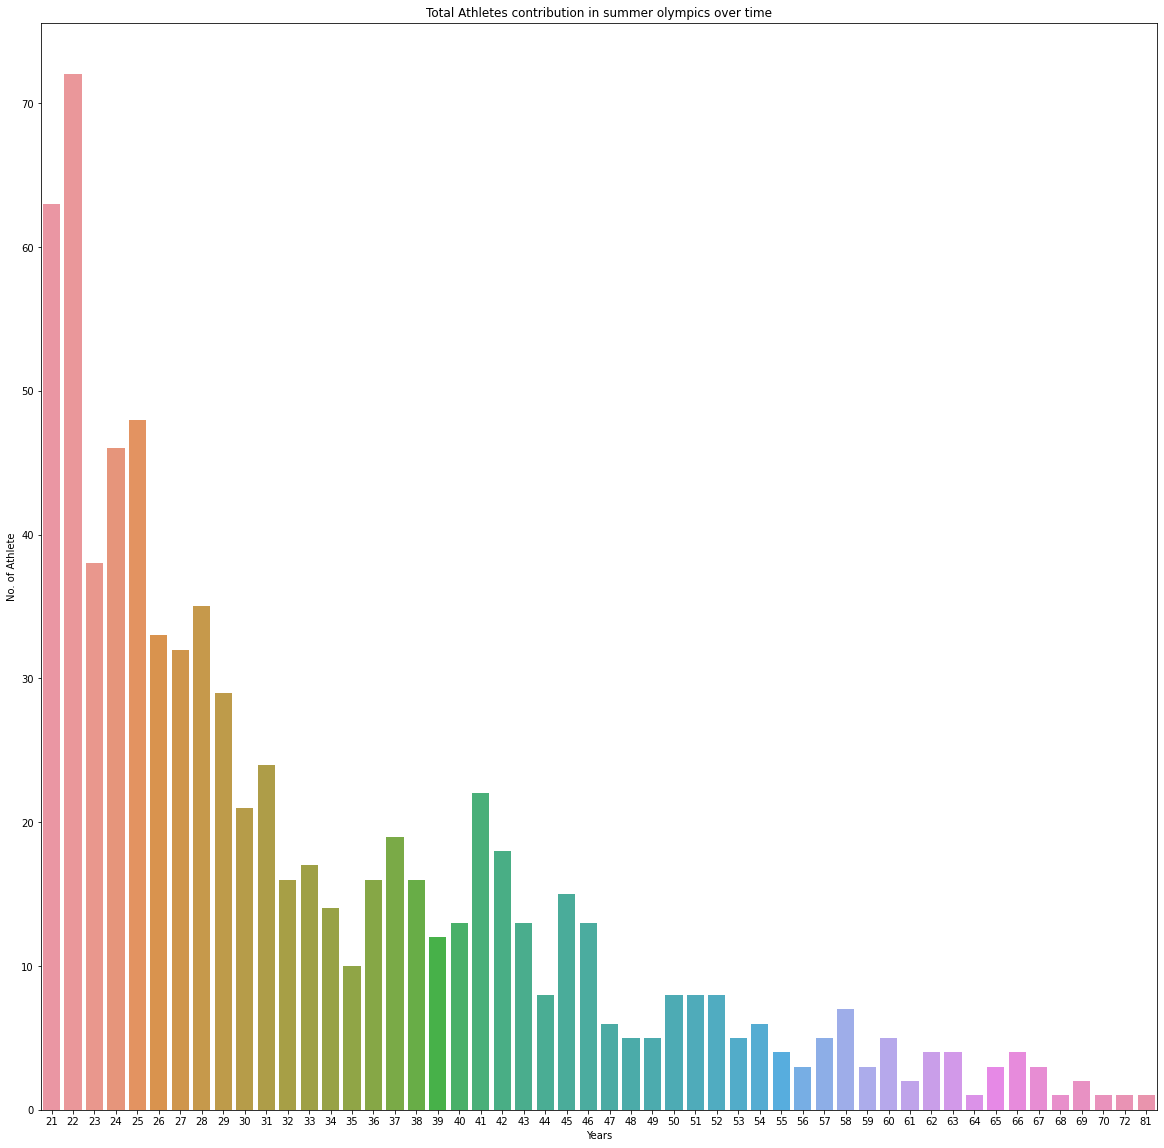

In [146]:
plt.figure(figsize=(20, 20))
sns.countplot(data['Age'])
plt.title('Total Athletes contribution in summer olympics over time')
plt.xlabel('Years')
plt.ylabel('No. of Athlete')

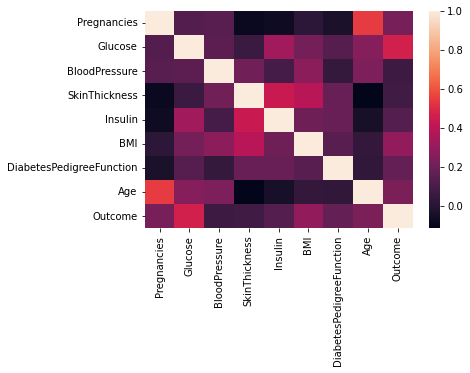

In [147]:
sns.heatmap(data.corr())
plt.show()

<AxesSubplot:xlabel='Outcome', ylabel='count'>

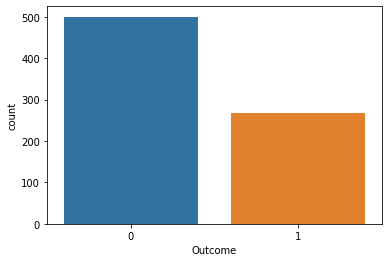

In [148]:
sns.countplot(x = 'Outcome',data = data)

<AxesSubplot:xlabel='Age', ylabel='count'>

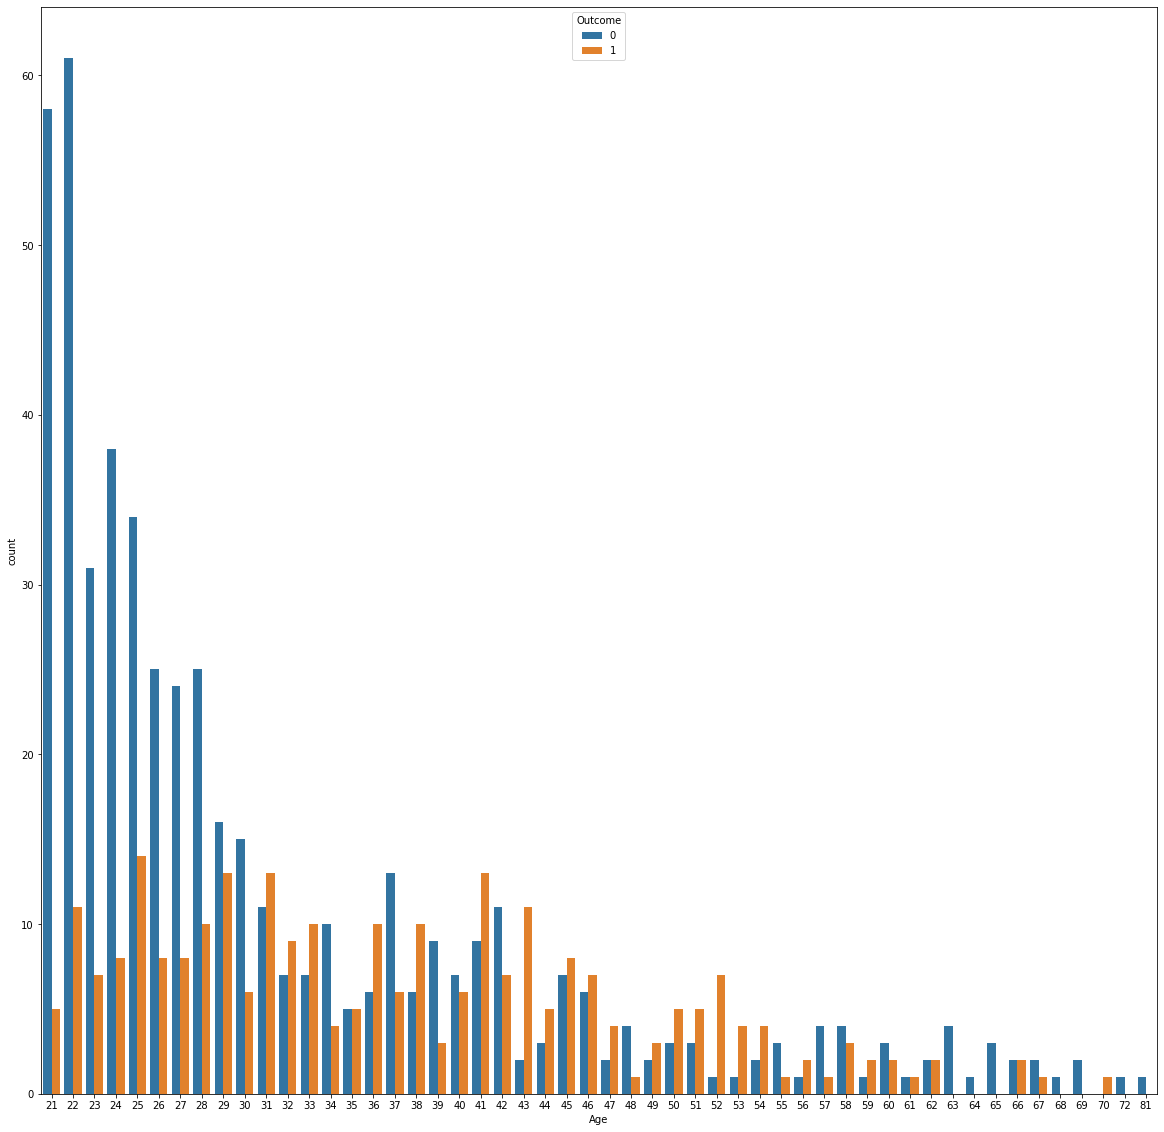

In [149]:
plt.figure(figsize=(20, 20))
sns.countplot(x = 'Age',hue='Outcome', data = data)

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

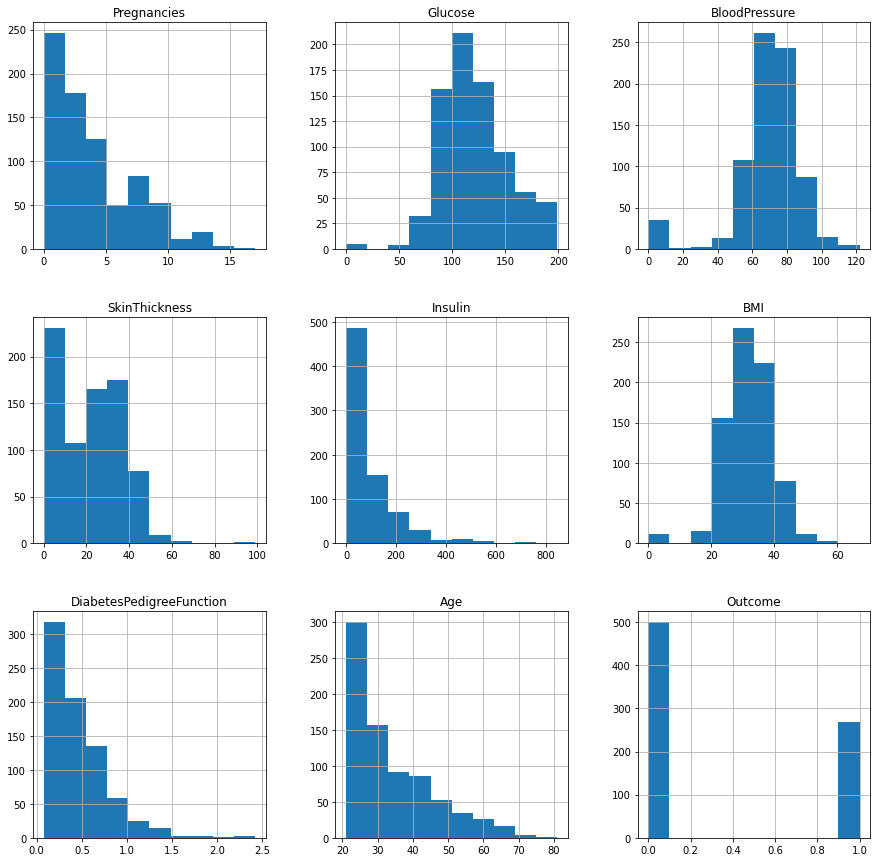

In [150]:
data.hist(figsize=(15, 15))

c:\python39\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\python39\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\python39\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\python39\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\python39\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\python39\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with 

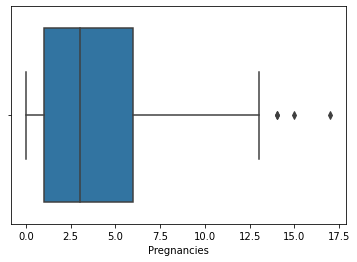

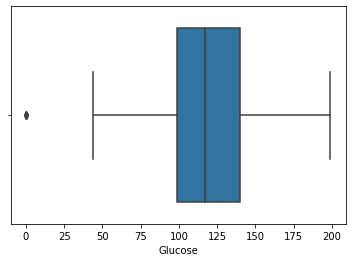

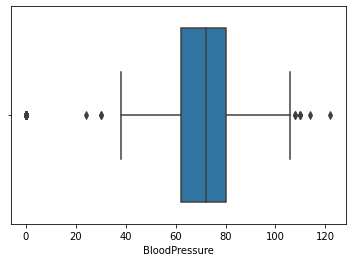

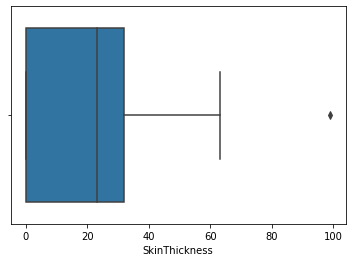

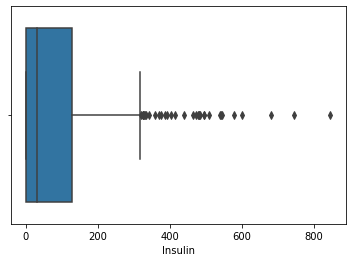

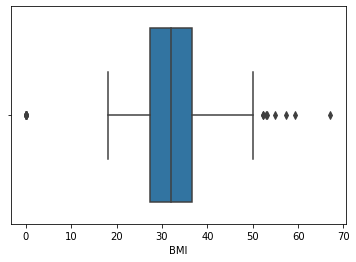

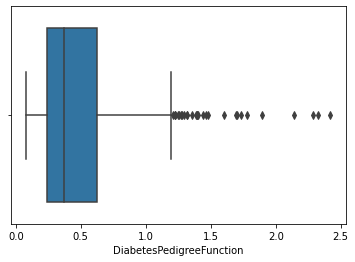

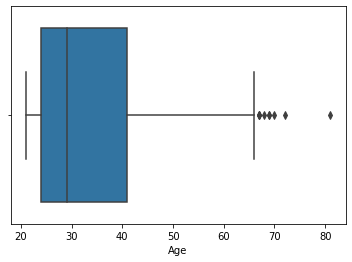

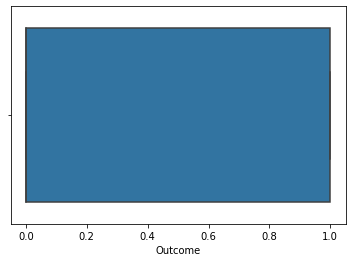

In [151]:
for c in data.columns:
    plt.figure()
    sns.boxplot(x = c, data = data, orient = "v")
    

c:\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


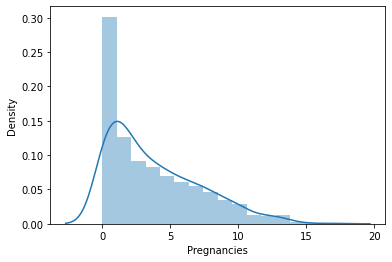

c:\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


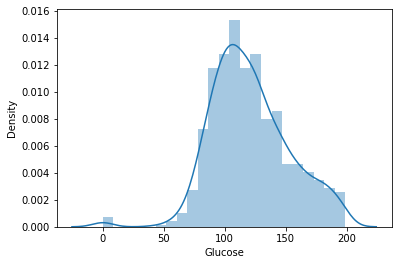

c:\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


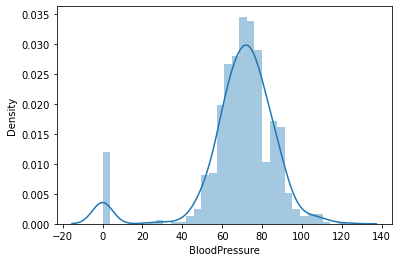

c:\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


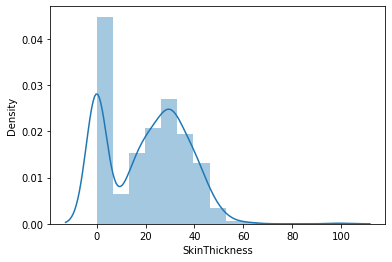

c:\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


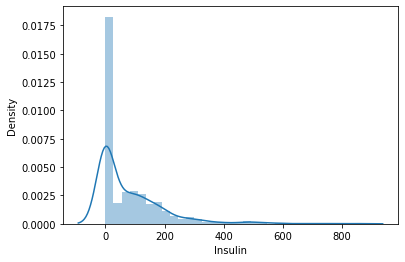

c:\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


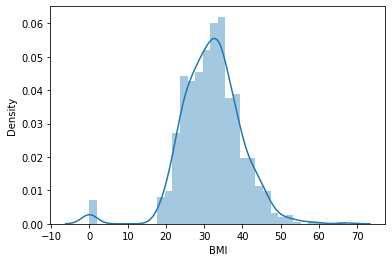

c:\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


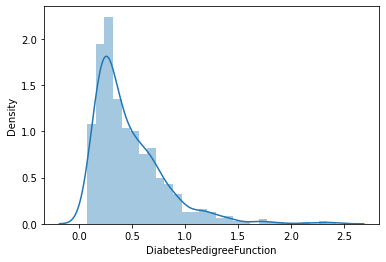

c:\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


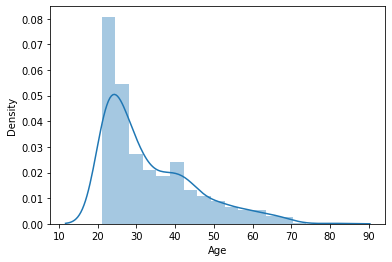

c:\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


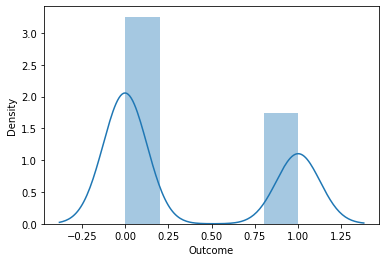

In [152]:
for i in data.columns:
    plt.figure()
    sns.distplot(data[i])
    plt.show()
    

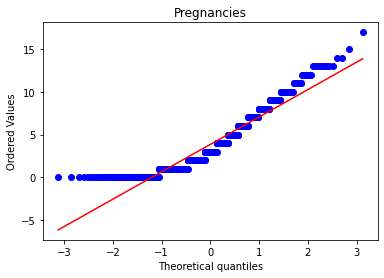

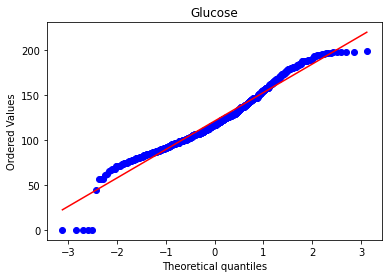

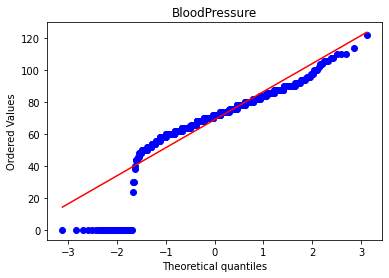

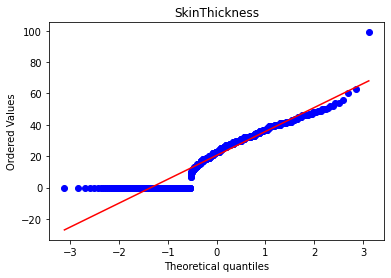

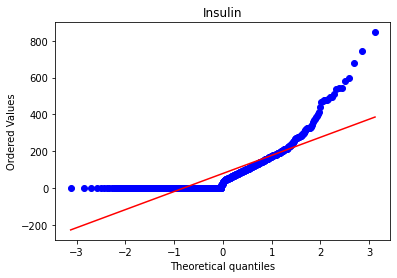

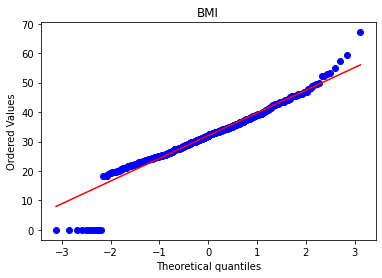

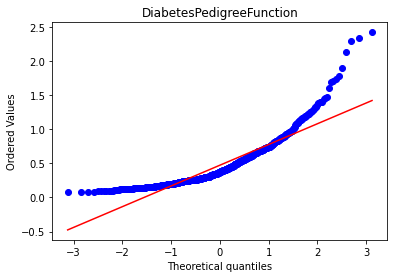

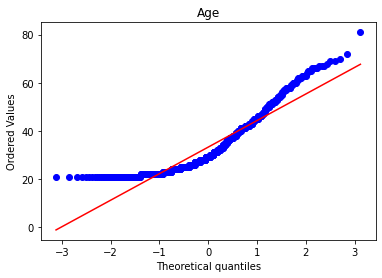

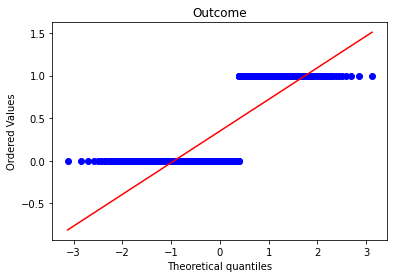

In [153]:
for i in data.columns:
    plt.figure()
    stats.probplot(data[i], plot = plt)
    plt.title(i)
    plt.show()

In [154]:
x = data.drop(columns = "Outcome")
y = data["Outcome"]

In [155]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [156]:
print('X train shape: ', x_train.shape)
print('Y train shape: ', y_train.shape)
print('X test shape: ', y_test.shape)
print('Y test shape: ', y_test.shape)

X train shape:  (614, 8)
Y train shape:  (614,)
X test shape:  (154,)
Y test shape:  (154,)


minmax

In [157]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
x_train_min= mms.fit_transform(x_train)
x_test_min = mms.transform(x_test)

0.8051948051948052
              precision    recall  f1-score   support

           0       0.84      0.87      0.86       103
           1       0.72      0.67      0.69        51

    accuracy                           0.81       154
   macro avg       0.78      0.77      0.78       154
weighted avg       0.80      0.81      0.80       154

F1 is:  0.6938775510204082


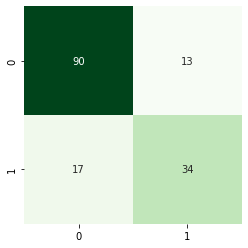

In [158]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train_min,y_train)

dt_pred = dt.predict(x_test_min)

dt_acc = accuracy_score(dt_pred,y_test)
print(dt_acc)

clf_report = classification_report(dt_pred,y_test)
print(clf_report)

cm = confusion_matrix(dt_pred,y_test)
sns.heatmap(cm, square=True, annot=True, cmap='Greens', fmt='d', cbar=False)

print('F1 is: ', f1_score(dt_pred,y_test))

0.7662337662337663
              precision    recall  f1-score   support

         0.0       0.80      0.85      0.83       101
         1.0       0.68      0.60      0.64        53

    accuracy                           0.77       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.77      0.76       154

F1 is:  0.64


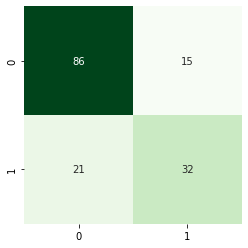

In [159]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train_min,y_train)

dt_pred = dt.predict(x_test_min)

dt_acc = accuracy_score(dt_pred,y_test)
print(dt_acc)

clf_report = classification_report(dt_pred,y_test)
print(clf_report)

cm = confusion_matrix(dt_pred,y_test)
sns.heatmap(cm, square=True, annot=True, cmap='Greens', fmt='d', cbar=False)

print('F1 is: ', f1_score(dt_pred,y_test))

0.8311688311688312
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       111
           1       0.68      0.74      0.71        43

    accuracy                           0.83       154
   macro avg       0.79      0.80      0.80       154
weighted avg       0.84      0.83      0.83       154

F1 is:  0.711111111111111


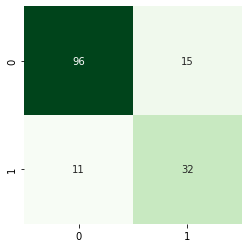

In [160]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train_min,y_train)

rf_pred = rf.predict(x_test_min)

rf_acc = accuracy_score(rf_pred,y_test)
print(rf_acc)

clf_report = classification_report(rf_pred,y_test)
print(clf_report)

cm = confusion_matrix(rf_pred,y_test)
sns.heatmap(cm, square=True, annot=True, cmap='Greens', fmt='d', cbar=False)

print('F1 is: ', f1_score(rf_pred,y_test))

0.8181818181818182
              precision    recall  f1-score   support

           0       0.93      0.83      0.88       119
           1       0.57      0.77      0.66        35

    accuracy                           0.82       154
   macro avg       0.75      0.80      0.77       154
weighted avg       0.85      0.82      0.83       154

F1 is:  0.6585365853658536


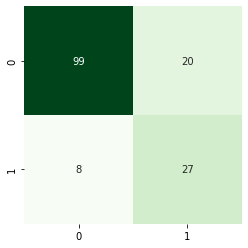

In [161]:
from sklearn.linear_model import LogisticRegression 
lr=LogisticRegression()
lr.fit(x_train_min,y_train)

#predicting
lr_predict=lr.predict(x_test_min)

lr_acc=accuracy_score(y_test,lr_predict)
print(lr_acc)

clf_report = classification_report(lr_predict,y_test)
print(clf_report)

cm = confusion_matrix(lr_predict,y_test)
sns.heatmap(cm, square=True, annot=True, cmap='Greens', fmt='d', cbar=False)

print('F1 is: ', f1_score(lr_predict,y_test))

0.7792207792207793
              precision    recall  f1-score   support

           0       0.91      0.80      0.85       121
           1       0.49      0.70      0.57        33

    accuracy                           0.78       154
   macro avg       0.70      0.75      0.71       154
weighted avg       0.82      0.78      0.79       154

F1 is:  0.575


c:\python39\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


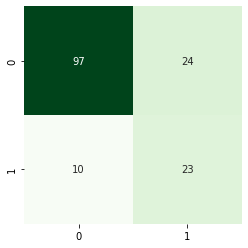

In [162]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(x_train_min,y_train)

knn_pred = knn.predict(x_test_min)

knn_acc = accuracy_score(knn_pred,y_test)
print(knn_acc)

clf_report = classification_report(knn_pred,y_test)
print(clf_report)

cm = confusion_matrix(knn_pred,y_test)
sns.heatmap(cm, square=True, annot=True, cmap='Greens', fmt='d', cbar=False)

print('F1 is: ', f1_score(knn_pred,y_test))

0.7987012987012987
              precision    recall  f1-score   support

           0       0.91      0.82      0.86       118
           1       0.55      0.72      0.63        36

    accuracy                           0.80       154
   macro avg       0.73      0.77      0.74       154
weighted avg       0.82      0.80      0.81       154

F1 is:  0.6265060240963856


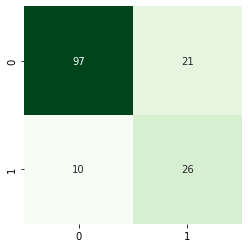

In [163]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train_min,y_train)

svm_pred = svm.predict(x_test_min)

svm_acc = accuracy_score(svm_pred,y_test)
print(svm_acc)

clf_report = classification_report(svm_pred,y_test)
print(clf_report)

cm = confusion_matrix(svm_pred,y_test)
sns.heatmap(cm, square=True, annot=True, cmap='Greens', fmt='d', cbar=False)

print('F1 is: ', f1_score(svm_pred,y_test))

0.7922077922077922
              precision    recall  f1-score   support

           0       0.87      0.84      0.85       111
           1       0.62      0.67      0.64        43

    accuracy                           0.79       154
   macro avg       0.74      0.76      0.75       154
weighted avg       0.80      0.79      0.79       154

F1 is:  0.6444444444444444


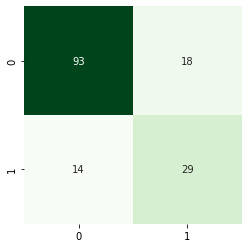

In [164]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train_min,y_train)

nb_pred = nb.predict(x_test_min)

nb_acc = accuracy_score(nb_pred,y_test)
print(nb_acc)

clf_report = classification_report(nb_pred,y_test)
print(clf_report)

cm = confusion_matrix(nb_pred,y_test)
sns.heatmap(cm, square=True, annot=True, cmap='Greens', fmt='d', cbar=False)

print('F1 is: ', f1_score(nb_pred,y_test))

0.7597402597402597
              precision    recall  f1-score   support

           0       0.74      0.90      0.81        88
           1       0.81      0.58      0.67        66

    accuracy                           0.76       154
   macro avg       0.77      0.74      0.74       154
weighted avg       0.77      0.76      0.75       154

F1 is:  0.672566371681416


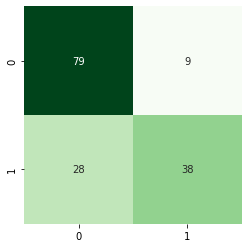

In [165]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(x_train_min,y_train)

sgd_pred = sgd.predict(x_test_min)

sgd_acc = accuracy_score(sgd_pred,y_test)
print(sgd_acc)

clf_report = classification_report(sgd_pred,y_test)
print(clf_report)

cm = confusion_matrix(sgd_pred,y_test)
sns.heatmap(cm, square=True, annot=True, cmap='Greens', fmt='d', cbar=False)

print('F1 is: ', f1_score(sgd_pred,y_test))

In [166]:
models = []
from sklearn.metrics import accuracy_score

models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('SVC', SVC()))
models.append(('NB', GaussianNB()))
models.append(('SGD', SGDClassifier()))


names = []
scores = []
for name, model in models:
    model.fit(x_train_min, y_train)
    y_pred = model.predict(x_test_min)
    scores.append(accuracy_score(y_pred, y_test))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

c:\python39\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


  Name     Score
0  KNN  0.779221
1   DT  0.818182
2   RF  0.792208
3   LR  0.818182
4  SVC  0.798701
5   NB  0.792208
6  SGD  0.818182


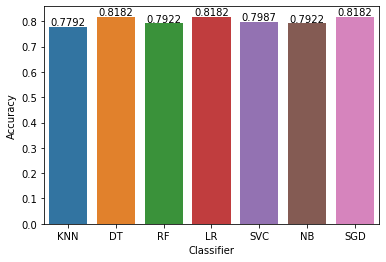

In [167]:

axis = sns.barplot(x = 'Name', y = 'Score', data =tr_split )
axis.set(xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

PCA

In [168]:
from sklearn.decomposition import PCA
mms=PCA()
x_train_pca = mms.fit_transform(x_train)
x_test_pca = mms.transform(x_test)

0.7272727272727273
              precision    recall  f1-score   support

           0       0.76      0.84      0.79        97
           1       0.66      0.54      0.60        57

    accuracy                           0.73       154
   macro avg       0.71      0.69      0.70       154
weighted avg       0.72      0.73      0.72       154

F1 is:  0.5961538461538461


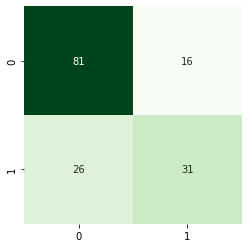

In [169]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train_pca,y_train)

dt_pred = dt.predict(x_test_pca)

dt_acc = accuracy_score(dt_pred,y_test)
print(dt_acc)

clf_report = classification_report(dt_pred,y_test)
print(clf_report)

cm = confusion_matrix(dt_pred,y_test)
sns.heatmap(cm, square=True, annot=True, cmap='Greens', fmt='d', cbar=False)

print('F1 is: ', f1_score(dt_pred,y_test))

0.7077922077922078
              precision    recall  f1-score   support

         0.0       0.74      0.82      0.78        96
         1.0       0.64      0.52      0.57        58

    accuracy                           0.71       154
   macro avg       0.69      0.67      0.67       154
weighted avg       0.70      0.71      0.70       154

F1 is:  0.5714285714285714


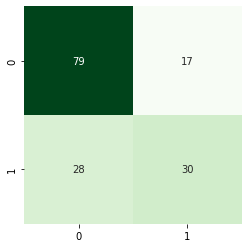

In [170]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train_pca,y_train)

dt_pred = dt.predict(x_test_pca)

dt_acc = accuracy_score(dt_pred,y_test)
print(dt_acc)

clf_report = classification_report(dt_pred,y_test)
print(clf_report)

cm = confusion_matrix(dt_pred,y_test)
sns.heatmap(cm, square=True, annot=True, cmap='Greens', fmt='d', cbar=False)

print('F1 is: ', f1_score(dt_pred,y_test))

0.8116883116883117
              precision    recall  f1-score   support

           0       0.87      0.86      0.87       108
           1       0.68      0.70      0.69        46

    accuracy                           0.81       154
   macro avg       0.78      0.78      0.78       154
weighted avg       0.81      0.81      0.81       154

F1 is:  0.6881720430107526


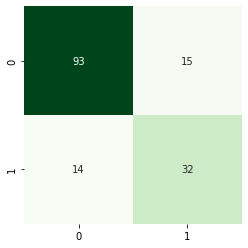

In [171]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train_pca,y_train)

rf_pred = rf.predict(x_test_pca)

rf_acc = accuracy_score(rf_pred,y_test)
print(rf_acc)

clf_report = classification_report(rf_pred,y_test)
print(clf_report)

cm = confusion_matrix(rf_pred,y_test)
sns.heatmap(cm, square=True, annot=True, cmap='Greens', fmt='d', cbar=False)

print('F1 is: ', f1_score(rf_pred,y_test))

0.8246753246753247
              precision    recall  f1-score   support

           0       0.92      0.84      0.88       116
           1       0.62      0.76      0.68        38

    accuracy                           0.82       154
   macro avg       0.77      0.80      0.78       154
weighted avg       0.84      0.82      0.83       154

F1 is:  0.6823529411764706


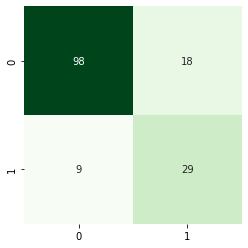

In [172]:
from sklearn.linear_model import LogisticRegression 
lr=LogisticRegression()
lr.fit(x_train_pca,y_train)

#predicting
lr_predict=lr.predict(x_test_pca)

lr_acc=accuracy_score(y_test,lr_predict)
print(lr_acc)

clf_report = classification_report(lr_predict,y_test)
print(clf_report)

cm = confusion_matrix(lr_predict,y_test)
sns.heatmap(cm, square=True, annot=True, cmap='Greens', fmt='d', cbar=False)

print('F1 is: ', f1_score(lr_predict,y_test))

0.7922077922077922
              precision    recall  f1-score   support

           0       0.90      0.82      0.86       117
           1       0.55      0.70      0.62        37

    accuracy                           0.79       154
   macro avg       0.73      0.76      0.74       154
weighted avg       0.81      0.79      0.80       154

F1 is:  0.6190476190476191


c:\python39\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


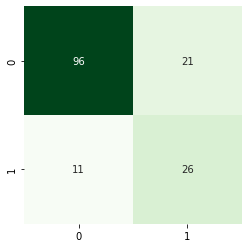

In [173]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(x_train_pca,y_train)

knn_pred = knn.predict(x_test_pca)

knn_acc = accuracy_score(knn_pred,y_test)
print(knn_acc)

clf_report = classification_report(knn_pred,y_test)
print(clf_report)

cm = confusion_matrix(knn_pred,y_test)
sns.heatmap(cm, square=True, annot=True, cmap='Greens', fmt='d', cbar=False)

print('F1 is: ', f1_score(knn_pred,y_test))

0.8116883116883117
              precision    recall  f1-score   support

           0       0.91      0.84      0.87       116
           1       0.60      0.74      0.66        38

    accuracy                           0.81       154
   macro avg       0.75      0.79      0.76       154
weighted avg       0.83      0.81      0.82       154

F1 is:  0.6588235294117647


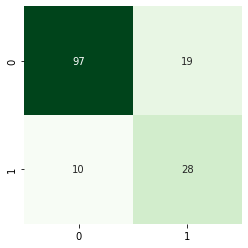

In [174]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train_pca,y_train)

svm_pred = svm.predict(x_test_pca)

svm_acc = accuracy_score(svm_pred,y_test)
print(svm_acc)

clf_report = classification_report(svm_pred,y_test)
print(clf_report)

cm = confusion_matrix(svm_pred,y_test)
sns.heatmap(cm, square=True, annot=True, cmap='Greens', fmt='d', cbar=False)

print('F1 is: ', f1_score(svm_pred,y_test))

0.7922077922077922
              precision    recall  f1-score   support

           0       0.89      0.83      0.86       115
           1       0.57      0.69      0.63        39

    accuracy                           0.79       154
   macro avg       0.73      0.76      0.74       154
weighted avg       0.81      0.79      0.80       154

F1 is:  0.627906976744186


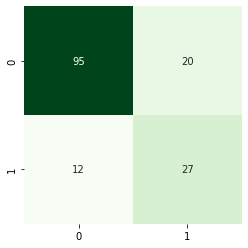

In [175]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train_pca,y_train)

nb_pred = nb.predict(x_test_pca)

nb_acc = accuracy_score(nb_pred,y_test)
print(nb_acc)

clf_report = classification_report(nb_pred,y_test)
print(clf_report)

cm = confusion_matrix(nb_pred,y_test)
sns.heatmap(cm, square=True, annot=True, cmap='Greens', fmt='d', cbar=False)

print('F1 is: ', f1_score(nb_pred,y_test))

0.7467532467532467
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       112
           1       0.53      0.60      0.56        42

    accuracy                           0.75       154
   macro avg       0.69      0.70      0.69       154
weighted avg       0.76      0.75      0.75       154

F1 is:  0.5617977528089887


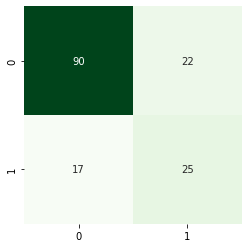

In [176]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(x_train_pca,y_train)

sgd_pred = sgd.predict(x_test_pca)

sgd_acc = accuracy_score(sgd_pred,y_test)
print(sgd_acc)

clf_report = classification_report(sgd_pred,y_test)
print(clf_report)

cm = confusion_matrix(sgd_pred,y_test)
sns.heatmap(cm, square=True, annot=True, cmap='Greens', fmt='d', cbar=False)

print('F1 is: ', f1_score(sgd_pred,y_test))

In [177]:
models = []
from sklearn.metrics import accuracy_score

models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('SVC', SVC()))
models.append(('NB', GaussianNB()))
models.append(('SGD', SGDClassifier()))


names = []
scores = []
for name, model in models:
    model.fit(x_train_pca, y_train)
    y_pred = model.predict(x_test_pca)
    scores.append(accuracy_score(y_pred, y_test))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

c:\python39\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


  Name     Score
0  KNN  0.753247
1   DT  0.707792
2   RF  0.798701
3   LR  0.824675
4  SVC  0.811688
5   NB  0.792208
6  SGD  0.642857


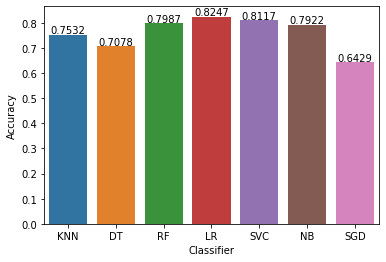

In [178]:

axis = sns.barplot(x = 'Name', y = 'Score', data =tr_split )
axis.set(xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()